# **Chapter 3. Python 을 활용한 데이터 전처리** 





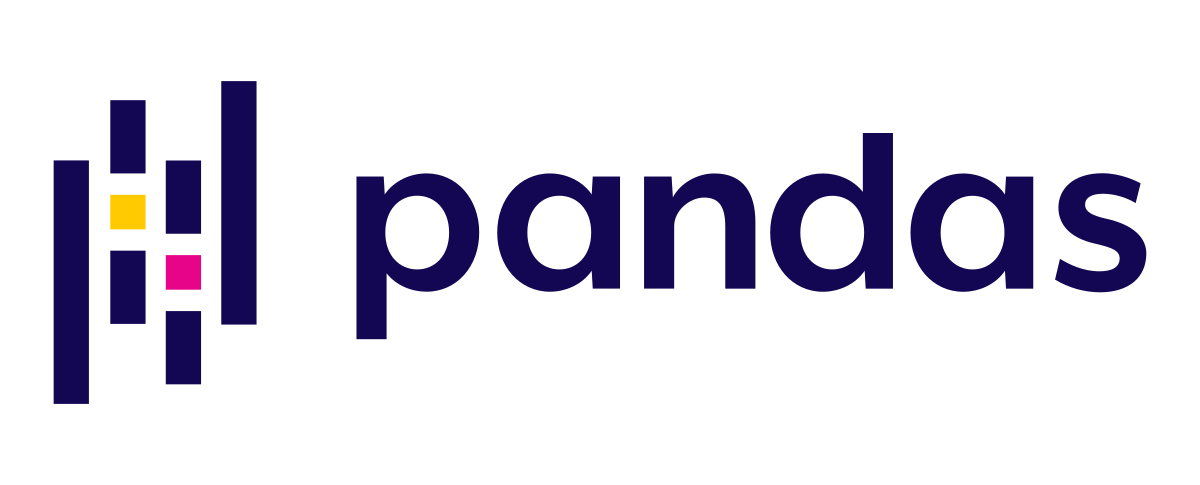


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> **3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기** <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-6. 데이터 슬라이싱(Slicing) 을 통해 Pandas 익숙해지기

In [1]:
# 라이브러리 임포트
import pandas as pd

In [2]:
# 실습 파일 로딩 (아이돌 프로필)
# df = pd.read_csv('https://bit.ly/3gRXTfD')
df = pd.read_csv('kpop_idols.csv')
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [3]:
# 상위 10개행, 1열~10열
# iloc[행시작인덱스:행끝인덱스, 열시작인덱스:열끝인덱스], 끝인덱스 포함안함 
df = df.iloc[:,1:11].head(10)
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

> ###  **3-6-1. 행(row), 열(column) 선택하기**


> **행 (row) 선택하기**
> - 행 하나 가져오기 (`df['행 시작 인덱스' : '행 시작 인덱스+1']`)
> - 행 여러개 가져오기 (`df['행 시작 인덱스` : `행 끝 인덱스']`)

In [4]:
# 행 하나 가져오기
df[0:1]

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon  Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44

In [5]:
df[1:2]

Stage Name   Full Name Korean Name K. Stage Name Date of Birth Group  \
1      Sunny  Lee Sunkyu         이순규            써니    1989-05-15  SNSD   

       Country Second Country  Height  Weight  
1  South Korea            NaN     158      43

In [6]:
# 행 여러개 가져오기
df[0:2]

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon  Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny   Lee Sunkyu         이순규            써니    1989-05-15  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43

In [7]:
df[5:]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

> **열 (column) 선택하기**
> - 열 하나 가져오기 (`df['컬럼명']` 또는 `df.컬럼명`)
> - 열 여러개 가져오기 (`df[['컬럼1', 컬럼2', ...]]`)
> - 범위 설정으로 열 여러개 가져오기 (`df[df.columns[시작인덱스:끝인덱스]]`)

In [8]:
df.columns

Index(['Stage Name', 'Full Name', 'Korean Name', 'K. Stage Name',
       'Date of Birth', 'Group', 'Country', 'Second Country', 'Height',
       'Weight'],
      dtype='object')

In [9]:
# 열 하나 가져오기
df['Korean Name']

0      김태연
1      이순규
2      황미영
3      김효연
4      권유리
5      최수영
6      임윤아
7      서주현
8    제시카 정
9      이채린
Name: Korean Name, dtype: object

In [10]:
# 열 하나 가져오기 (추천하지 않음)
df.Group

0    SNSD
1    SNSD
2    SNSD
3    SNSD
4    SNSD
5    SNSD
6    SNSD
7    SNSD
8     NaN
9    2NE1
Name: Group, dtype: object

In [11]:
# 열 여러개 가져오기
df[['Korean Name', 'Group']]

Korean Name Group
0         김태연  SNSD
1         이순규  SNSD
2         황미영  SNSD
3         김효연  SNSD
4         권유리  SNSD
5         최수영  SNSD
6         임윤아  SNSD
7         서주현  SNSD
8       제시카 정   NaN
9         이채린  2NE1

> ###  **3-6-2. loc, iloc 을 사용해 편하게 조회하기**
> - loc, iloc 은 Pandas 에서 데이터 조작을 한층 쉽게 만들어주는 **매우 유용한 메소드** 입니다. <br>
> - 인덱싱(indexing) 방식을 통해 **데이터 읽기/쓰기**, **슬라이싱** 등 다양한 전처리 기능을 제공합니다. 
> - **조건문을 기본적으로 활용**할 수 있으며, 쿼리(SQL) 문과 같이 **원하는 조건에 맞는 데이터**를 추출할 수 있습니다.
> - 반복문을 돌며 값을 검색하는 것이 아닌, 인덱스를 사용해 바로 찾아내는 (Vectorization) 방식이기 때문에, **매우 검색이 빠르며**, Pandas 에서도 loc 과 iloc 사용을 권장합니다.
> - 기본형  
    - **`df.loc[ '행 슬라이싱 영역' , '열 슬라이싱 영역' ]`**  
    - **`df.iloc[ '행 슬라이싱 영역' , '열 슬라이싱 영역' ]`**
> <br>
>


> #### **loc**
> - 행과 열의 데이터를 조회할 때 **'특정 레이블(label)'** 을 통해 접근하는 방법
> - `location` 의 약어로, 사람이 읽을 수 있는 레이블 값을 사용

In [12]:
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

> **1. [loc] 특정 행 조회**

In [13]:
# 특정 행 조회
df.loc[0]

Stage Name            Taeyeon
Full Name         Kim Taeyeon
Korean Name               김태연
K. Stage Name              태연
Date of Birth      1989-03-09
Group                    SNSD
Country           South Korea
Second Country            NaN
Height                    160
Weight                     44
Name: 0, dtype: object

In [14]:
type(df.loc[0])

pandas.core.series.Series

In [15]:
df.loc[[0]]

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon  Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44

In [16]:
type(df.loc[[0]])

pandas.core.frame.DataFrame

In [17]:
df.loc[[0,1]]

Stage Name    Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon  Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny   Lee Sunkyu         이순규            써니    1989-05-15  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43

In [18]:
df.loc[[0,3,5]]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
3  South Korea            NaN     158      48  
5  South Korea            NaN     170      48

In [19]:
df.loc[1:4]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

In [20]:
# 문자열 인덱스로 변경
loc_df = df.copy()
loc_df.index = loc_df['Korean Name']
print(loc_df.index)

Index(['김태연', '이순규', '황미영', '김효연', '권유리', '최수영', '임윤아', '서주현', '제시카 정', '이채린'], dtype='object', name='Korean Name')


In [21]:
loc_df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
Korean Name                                                                     
김태연            Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
이순규              Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
황미영            Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
김효연            Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
권유리               Yuri      Kwon Yuri         권유리            유리    1989-12-05   
최수영           Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10   
임윤아              Yoona       Im Yoona         임윤아            윤아    1990-05-30   
서주현            Seohyun    Seo Joohyun         서주현            서현    1991-06-28   
제시카 정          Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   
이채린                 CL    Lee Chaerin         이채린            씨엘    1991-02-26   

            Group      Country Second Country  Height  Weight  
Korean Name                                                    
김태연          SNSD  South Korea            NaN     160      44  
이순규          SNSD  South Korea            NaN     158      43  
황미영          SNSD  South Korea            USA     163      50  
김효연          SNSD  South Korea            NaN     158      48  
권유리          SNSD  South Korea            NaN     167      45  
최수영          SNSD  South Korea            NaN     170      48  
임윤아          SNSD  South Korea            NaN     166      47  
서주현          SNSD  South Korea            NaN     168      48  
제시카 정         NaN  South Korea            NaN       0       0  
이채린          2NE1  South Korea            NaN       0       0

In [22]:
loc_df.loc['임윤아']

Stage Name              Yoona
Full Name            Im Yoona
Korean Name               임윤아
K. Stage Name              윤아
Date of Birth      1990-05-30
Group                    SNSD
Country           South Korea
Second Country            NaN
Height                    166
Weight                     47
Name: 임윤아, dtype: object

In [23]:
loc_df.loc['임윤아':'제시카 정']

Stage Name     Full Name Korean Name K. Stage Name Date of Birth  \
Korean Name                                                                    
임윤아              Yoona      Im Yoona         임윤아            윤아    1990-05-30   
서주현            Seohyun   Seo Joohyun         서주현            서현    1991-06-28   
제시카 정          Jessica  Jessica Jung       제시카 정           제시카    1989-04-18   

            Group      Country Second Country  Height  Weight  
Korean Name                                                    
임윤아          SNSD  South Korea            NaN     166      47  
서주현          SNSD  South Korea            NaN     168      48  
제시카 정         NaN  South Korea            NaN       0       0

In [24]:
loc_df.iloc[6]

Stage Name              Yoona
Full Name            Im Yoona
Korean Name               임윤아
K. Stage Name              윤아
Date of Birth      1990-05-30
Group                    SNSD
Country           South Korea
Second Country            NaN
Height                    166
Weight                     47
Name: 임윤아, dtype: object

In [25]:
loc_df.loc[['임윤아', '이순규', '김태연']]

Stage Name    Full Name Korean Name K. Stage Name Date of Birth  \
Korean Name                                                                   
임윤아              Yoona     Im Yoona         임윤아            윤아    1990-05-30   
이순규              Sunny   Lee Sunkyu         이순규            써니    1989-05-15   
김태연            Taeyeon  Kim Taeyeon         김태연            태연    1989-03-09   

            Group      Country Second Country  Height  Weight  
Korean Name                                                    
임윤아          SNSD  South Korea            NaN     166      47  
이순규          SNSD  South Korea            NaN     158      43  
김태연          SNSD  South Korea            NaN     160      44

> **2. [loc] 조건문을 사용한 행 조회 (**`df.loc[ '조건문' ]`**)**

In [26]:
df.head()

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

In [27]:
df.loc[df['Korean Name']=='임윤아']

Stage Name Full Name Korean Name K. Stage Name Date of Birth Group  \
6      Yoona  Im Yoona         임윤아            윤아    1990-05-30  SNSD   

       Country Second Country  Height  Weight  
6  South Korea            NaN     166      47

In [28]:
df.loc[(df['Korean Name']=='임윤아')|(df['Korean Name']=='권유리')]

Stage Name  Full Name Korean Name K. Stage Name Date of Birth Group  \
4       Yuri  Kwon Yuri         권유리            유리    1989-12-05  SNSD   
6      Yoona   Im Yoona         임윤아            윤아    1990-05-30  SNSD   

       Country Second Country  Height  Weight  
4  South Korea            NaN     167      45  
6  South Korea            NaN     166      47

In [29]:
df.loc[df['Korean Name']!='임윤아']

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

In [30]:
df.loc[df['Height']>=160]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
2  South Korea            USA     163      50  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

> **3. [loc] 특정 열 조회**

In [31]:
df.columns

Index(['Stage Name', 'Full Name', 'Korean Name', 'K. Stage Name',
       'Date of Birth', 'Group', 'Country', 'Second Country', 'Height',
       'Weight'],
      dtype='object')

In [32]:
# 특정 열 조회
df.loc[:, ['Korean Name']]

Korean Name
0         김태연
1         이순규
2         황미영
3         김효연
4         권유리
5         최수영
6         임윤아
7         서주현
8       제시카 정
9         이채린

In [33]:
df.loc[:, 'Korean Name']

0      김태연
1      이순규
2      황미영
3      김효연
4      권유리
5      최수영
6      임윤아
7      서주현
8    제시카 정
9      이채린
Name: Korean Name, dtype: object

In [34]:
df.loc[2:5, ['Korean Name']]

Korean Name
2         황미영
3         김효연
4         권유리
5         최수영

In [35]:
df.loc[:, ['Korean Name', 'K. Stage Name']]

Korean Name K. Stage Name
0         김태연            태연
1         이순규            써니
2         황미영           티파니
3         김효연            효연
4         권유리            유리
5         최수영            수영
6         임윤아            윤아
7         서주현            서현
8       제시카 정           제시카
9         이채린            씨엘

In [36]:
df.loc[:, 'Korean Name':'K. Stage Name']

Korean Name K. Stage Name
0         김태연            태연
1         이순규            써니
2         황미영           티파니
3         김효연            효연
4         권유리            유리
5         최수영            수영
6         임윤아            윤아
7         서주현            서현
8       제시카 정           제시카
9         이채린            씨엘

> **4. [loc] 조건문을 사용한 열 조회 (`df.loc[ : , '조건문']`)**

In [37]:
df.loc[:, df.columns == 'Korean Name']

Korean Name
0         김태연
1         이순규
2         황미영
3         김효연
4         권유리
5         최수영
6         임윤아
7         서주현
8       제시카 정
9         이채린

In [38]:
df.loc[:, df.columns != 'Korean Name']

Stage Name      Full Name K. Stage Name Date of Birth Group      Country  \
0    Taeyeon    Kim Taeyeon            태연    1989-03-09  SNSD  South Korea   
1      Sunny     Lee Sunkyu            써니    1989-05-15  SNSD  South Korea   
2    Tiffany  Hwang Miyoung           티파니    1989-08-01  SNSD  South Korea   
3    Hyoyeon    Kim Hyoyeon            효연    1989-09-22  SNSD  South Korea   
4       Yuri      Kwon Yuri            유리    1989-12-05  SNSD  South Korea   
5   Sooyoung  Choi Sooyoung            수영    1990-02-10  SNSD  South Korea   
6      Yoona       Im Yoona            윤아    1990-05-30  SNSD  South Korea   
7    Seohyun    Seo Joohyun            서현    1991-06-28  SNSD  South Korea   
8    Jessica   Jessica Jung           제시카    1989-04-18   NaN  South Korea   
9         CL    Lee Chaerin            씨엘    1991-02-26  2NE1  South Korea   

  Second Country  Height  Weight  
0            NaN     160      44  
1            NaN     158      43  
2            USA     163      50  
3            NaN     158      48  
4            NaN     167      45  
5            NaN     170      48  
6            NaN     166      47  
7            NaN     168      48  
8            NaN       0       0  
9            NaN       0       0

> **5. [loc] 행, 열 조건 조합**

In [39]:
# 코드를 입력해 주세요
df.loc[df['Korean Name']=='임윤아', ['Height']]

Height
6     166

In [40]:
df.loc[df['Korean Name']=='임윤아', df.columns == 'Height']

Height
6     166

> #### **iloc**
> - 행과 열의 데이터를 조회할 때 **'숫자 인덱스(integer index)'** 을 통해 접근하는 방법
> - `integer location` 의 약어로, 컴퓨터가 읽을 수 있는 인덱스 값을 사용

In [41]:
iloc_df = loc_df.copy()
iloc_df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
Korean Name                                                                     
김태연            Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
이순규              Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
황미영            Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
김효연            Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
권유리               Yuri      Kwon Yuri         권유리            유리    1989-12-05   
최수영           Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10   
임윤아              Yoona       Im Yoona         임윤아            윤아    1990-05-30   
서주현            Seohyun    Seo Joohyun         서주현            서현    1991-06-28   
제시카 정          Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   
이채린                 CL    Lee Chaerin         이채린            씨엘    1991-02-26   

            Group      Country Second Country  Height  Weight  
Korean Name                                                    
김태연          SNSD  South Korea            NaN     160      44  
이순규          SNSD  South Korea            NaN     158      43  
황미영          SNSD  South Korea            USA     163      50  
김효연          SNSD  South Korea            NaN     158      48  
권유리          SNSD  South Korea            NaN     167      45  
최수영          SNSD  South Korea            NaN     170      48  
임윤아          SNSD  South Korea            NaN     166      47  
서주현          SNSD  South Korea            NaN     168      48  
제시카 정         NaN  South Korea            NaN       0       0  
이채린          2NE1  South Korea            NaN       0       0

> **1. [iloc] 특정 행 조회**

In [42]:
# 특정 행 조회
iloc_df.iloc[0]

Stage Name            Taeyeon
Full Name         Kim Taeyeon
Korean Name               김태연
K. Stage Name              태연
Date of Birth      1989-03-09
Group                    SNSD
Country           South Korea
Second Country            NaN
Height                    160
Weight                     44
Name: 김태연, dtype: object

In [43]:
iloc_df.iloc[[0,3,5]]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
Korean Name                                                                     
김태연            Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
김효연            Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
최수영           Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10   

            Group      Country Second Country  Height  Weight  
Korean Name                                                    
김태연          SNSD  South Korea            NaN     160      44  
김효연          SNSD  South Korea            NaN     158      48  
최수영          SNSD  South Korea            NaN     170      48

In [44]:
iloc_df.iloc[1:5]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
Korean Name                                                                     
이순규              Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
황미영            Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
김효연            Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
권유리               Yuri      Kwon Yuri         권유리            유리    1989-12-05   

            Group      Country Second Country  Height  Weight  
Korean Name                                                    
이순규          SNSD  South Korea            NaN     158      43  
황미영          SNSD  South Korea            USA     163      50  
김효연          SNSD  South Korea            NaN     158      48  
권유리          SNSD  South Korea            NaN     167      45

> **2. [iloc] 특정 열 조회**

In [45]:
# 특정 열 조회
iloc_df.iloc[:, 3:5]

K. Stage Name Date of Birth
Korean Name                            
김태연                    태연    1989-03-09
이순규                    써니    1989-05-15
황미영                   티파니    1989-08-01
김효연                    효연    1989-09-22
권유리                    유리    1989-12-05
최수영                    수영    1990-02-10
임윤아                    윤아    1990-05-30
서주현                    서현    1991-06-28
제시카 정                 제시카    1989-04-18
이채린                    씨엘    1991-02-26

In [46]:
# 마지막 열 조회
iloc_df.iloc[:, -1:]

Weight
Korean Name        
김태연              44
이순규              43
황미영              50
김효연              48
권유리              45
최수영              48
임윤아              47
서주현              48
제시카 정             0
이채린               0

> ###  **3-6-3. Boolean Indexing, isin()**
> - **참/거짓 여부**를 판단해서 **특정 조건이 맞는 데이터만** 추출하는 방법입니다. <br>
> <br>
>


> **1. Boolean Indexing**

In [47]:
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

In [48]:
df['Height']>160

0    False
1    False
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9    False
Name: Height, dtype: bool

In [49]:
df.loc[df['Height']>160]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
2  South Korea            USA     163      50  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

In [50]:
df.loc[df['Height']>160, ['K. Stage Name', 'Date of Birth']]

K. Stage Name Date of Birth
2           티파니    1989-08-01
4            유리    1989-12-05
5            수영    1990-02-10
6            윤아    1990-05-30
7            서현    1991-06-28

> **2. isin() 을 활용한 색인**
> - **내가 정한 리스트(list) 안에 있는 값**들만 **가져오고 싶을 때** 사용하는 방법입니다.

In [51]:
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

In [52]:
group_name = ['SNSD'] # 리스트 지정

In [53]:
df['Group'].isin(group_name)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8    False
9    False
Name: Group, dtype: bool

In [54]:
df.loc[df['Group'].isin(group_name)]

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48

> ###  **3-6-4. 행(row), 열(column) 추가 및 삭제**
> - 행 추가 : **`pd.concat('추가할 행 정보(dict 또는 Series/DataFrame 타입)`** <br>
    - 인덱스를 무시하는 옵션 **`ignore_index=True` 을 반드시 추가해야 합니다!**
> - 열 추가 : **`df['추가할 열 이름'] = '추가할 열 정보(list 또는 Series 타입)`** <br>
> - 행/열 삭제 :   
    - 행 삭제 : **`df.drop(index=['삭제 하려는 행 인덱스'])`**  
    - 열 삭제 :  **`df.drop(columns=['삭제 하려는 열 이름'])`**
> <br>
>

In [55]:
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6      Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7    Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9         CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45  
5  South Korea            NaN     170      48  
6  South Korea            NaN     166      47  
7  South Korea            NaN     168      48  
8  South Korea            NaN       0       0  
9  South Korea            NaN       0       0

> **딕셔너리(dict) 를 활용한 행 추가**

In [56]:
new_row = {'Stage Name': 'FastCampus', 
           'Full Name': 'Fast Campus', 
           'Korean Name' : '패스트캠퍼스', 
           'K. Stage Name' : '패캠', 
           'Date of Birth' : '2017-01-01',
           'Group' : 'FC',
           'Country' : 'Soutch Korea',
           'Second Country' : None,
           'Height' : 180,
           'Weight' : 80}

In [57]:
# new_row를 데이터프레임으로 변환
new_row_df = pd.DataFrame([new_row])

# concat 사용
df = pd.concat([df, new_row_df], ignore_index=True)

In [58]:
df.tail()

Stage Name     Full Name Korean Name K. Stage Name Date of Birth Group  \
6        Yoona      Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7      Seohyun   Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8      Jessica  Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9           CL   Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   
10  FastCampus   Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   

         Country Second Country  Height  Weight  
6    South Korea            NaN     166      47  
7    South Korea            NaN     168      48  
8    South Korea            NaN       0       0  
9    South Korea            NaN       0       0  
10  Soutch Korea           None     180      80

> **시리즈(Series) 를 활용한 행 추가**


In [59]:
type(df.iloc[0])

pandas.core.series.Series

In [60]:
new_row = pd.DataFrame([df.iloc[0]])

In [61]:
df = pd.concat([df, new_row], ignore_index=True)
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0      Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1        Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2      Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3      Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4         Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5     Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6        Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7      Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8      Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9           CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   
10  FastCampus    Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   
11     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

         Country Second Country  Height  Weight  
0    South Korea            NaN     160      44  
1    South Korea            NaN     158      43  
2    South Korea            USA     163      50  
3    South Korea            NaN     158      48  
4    South Korea            NaN     167      45  
5    South Korea            NaN     170      48  
6    South Korea            NaN     166      47  
7    South Korea            NaN     168      48  
8    South Korea            NaN       0       0  
9    South Korea            NaN       0       0  
10  Soutch Korea           None     180      80  
11   South Korea            NaN     160      44

> **열(column) 추가**
> - **`df['추가할 열 이름'] = ['열에 대입할 값 리스트']`**
> - 리스트 형으로 열을 추가할 경우, **길이가 전체 행(row) 수 와 같아야 합니다.**


In [62]:
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0      Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1        Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2      Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3      Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4         Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5     Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6        Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7      Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8      Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9           CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   
10  FastCampus    Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   
11     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

         Country Second Country  Height  Weight  
0    South Korea            NaN     160      44  
1    South Korea            NaN     158      43  
2    South Korea            USA     163      50  
3    South Korea            NaN     158      48  
4    South Korea            NaN     167      45  
5    South Korea            NaN     170      48  
6    South Korea            NaN     166      47  
7    South Korea            NaN     168      48  
8    South Korea            NaN       0       0  
9    South Korea            NaN       0       0  
10  Soutch Korea           None     180      80  
11   South Korea            NaN     160      44

In [63]:
df['Blood Type'] = 'A'
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0      Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1        Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2      Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3      Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4         Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5     Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6        Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7      Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8      Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9           CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   
10  FastCampus    Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   
11     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

         Country Second Country  Height  Weight Blood Type  
0    South Korea            NaN     160      44          A  
1    South Korea            NaN     158      43          A  
2    South Korea            USA     163      50          A  
3    South Korea            NaN     158      48          A  
4    South Korea            NaN     167      45          A  
5    South Korea            NaN     170      48          A  
6    South Korea            NaN     166      47          A  
7    South Korea            NaN     168      48          A  
8    South Korea            NaN       0       0          A  
9    South Korea            NaN       0       0          A  
10  Soutch Korea           None     180      80          A  
11   South Korea            NaN     160      44          A

In [64]:
len(df)

12

In [65]:
df['Blood Type'] = ['A']*5 + ['B']*4 + ['O']*2 + ['AB']*1
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0      Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1        Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2      Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3      Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4         Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5     Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6        Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
7      Seohyun    Seo Joohyun         서주현            서현    1991-06-28  SNSD   
8      Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   NaN   
9           CL    Lee Chaerin         이채린            씨엘    1991-02-26  2NE1   
10  FastCampus    Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   
11     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

         Country Second Country  Height  Weight Blood Type  
0    South Korea            NaN     160      44          A  
1    South Korea            NaN     158      43          A  
2    South Korea            USA     163      50          A  
3    South Korea            NaN     158      48          A  
4    South Korea            NaN     167      45          A  
5    South Korea            NaN     170      48          B  
6    South Korea            NaN     166      47          B  
7    South Korea            NaN     168      48          B  
8    South Korea            NaN       0       0          B  
9    South Korea            NaN       0       0          O  
10  Soutch Korea           None     180      80          O  
11   South Korea            NaN     160      44         AB

> **행(row) / 열(column) 삭제**
> - 행 삭제 : **`df.drop(index=['삭제 하려는 행 인덱스'])`**
> - 열 삭제 : **`df.drop(columns=['삭제 하려는 열 이름'])`**


In [66]:
# 행 삭제
df = df.drop(index=[7,8,9])
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0      Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1        Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2      Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3      Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4         Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5     Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6        Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
10  FastCampus    Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   
11     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

         Country Second Country  Height  Weight Blood Type  
0    South Korea            NaN     160      44          A  
1    South Korea            NaN     158      43          A  
2    South Korea            USA     163      50          A  
3    South Korea            NaN     158      48          A  
4    South Korea            NaN     167      45          A  
5    South Korea            NaN     170      48          B  
6    South Korea            NaN     166      47          B  
10  Soutch Korea           None     180      80          O  
11   South Korea            NaN     160      44         AB

In [67]:
# 열 삭제
df = df.drop(columns=['Blood Type'], axis=1)
df

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0      Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1        Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2      Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3      Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4         Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   
5     Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10  SNSD   
6        Yoona       Im Yoona         임윤아            윤아    1990-05-30  SNSD   
10  FastCampus    Fast Campus      패스트캠퍼스            패캠    2017-01-01    FC   
11     Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   

         Country Second Country  Height  Weight  
0    South Korea            NaN     160      44  
1    South Korea            NaN     158      43  
2    South Korea            USA     163      50  
3    South Korea            NaN     158      48  
4    South Korea            NaN     167      45  
5    South Korea            NaN     170      48  
6    South Korea            NaN     166      47  
10  Soutch Korea           None     180      80  
11   South Korea            NaN     160      44